<a href="https://colab.research.google.com/github/kientran1706/kientran.github./blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phân loại loài hoa Iris

In [55]:
from google.colab import files
uploaded = files.upload()


Saving boxplots.png to boxplots (3).png
Saving corr1.png to corr1 (3).png
Saving corr2.png to corr2 (3).png
Saving iris.csv to iris (3).csv
Saving iris.data.csv to iris.data (3).csv
Saving iris.names to iris (3).names
Saving iris_classification.html to iris_classification (3).html
Saving iris_classification.ipynb to iris_classification (3).ipynb
Saving Iris_setosa.jpg to Iris_setosa (3).jpg
Saving Iris_versicolor.jpg to Iris_versicolor (3).jpg
Saving Iris_virginica.jpg to Iris_virginica (3).jpg


In [56]:
from PIL import Image
import matplotlib.pyplot as plt
image1 = Image.open("Iris_setosa.jpg")
image2 = Image.open("Iris_versicolor.jpg")
image3 = Image.open("Iris_virginica.jpg")
image1.show()
image2.show()
image3.show()


## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Bộ dữ liệu bao gồm 50 mẫu từ mỗi loài trong số ba loài Iris (Iris setosa, Iris virginica và Iris versicolor).
    + Bốn đặc điểm được đo từ mỗi mẫu: chiều dài và chiều rộng của các lá đài(sepal) và cánh hoa (petal), tính bằng cm.
+ **Dữ liệu vào**:
    + sepal length (cm)
    + sepal width (cm)
    + petal length (cm)
    + petal width (cm)
+ **Kết quả**: class (Iris Setosa, Iris Versicolour, Iris Virginica)

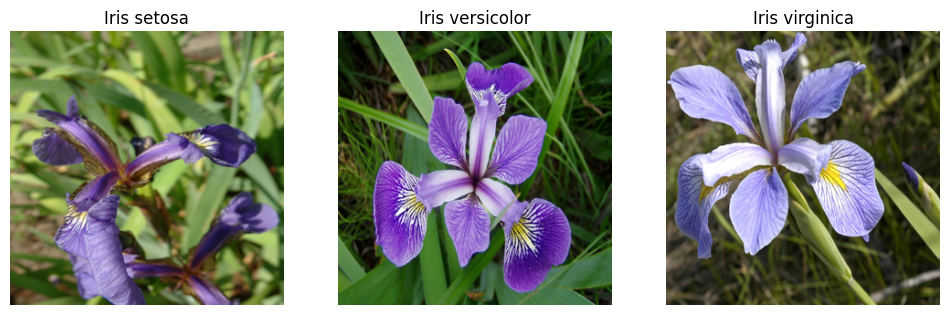

In [57]:
plt.figure(figsize=(12,12));
plt.subplot(1,3,1), plt.imshow(image1.resize((300,300))), plt.axis("off"), plt.title("Iris setosa");
plt.subplot(1,3,2), plt.imshow(image2.resize((300,300))), plt.axis("off"), plt.title("Iris versicolor");
plt.subplot(1,3,3), plt.imshow(image3.resize((300,300))), plt.axis("off"), plt.title("Iris virginica");
plt.show()

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [58]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [59]:
# Load dataset
import pandas as pd

df = pd.read_csv("iris.csv")
df = pd.read_csv("iris.data.csv")
print(df.head())


   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [60]:
import pandas as pd

# Ví dụ đọc file CSV
df_dataset = pd.read_csv("iris.csv")

# Sau đó mới được dùng
print(f'+ Shape: {df_dataset.shape}')
print(f'+ Data Types: \n{df_dataset.dtypes}')

import IPython.display as display
print('\n+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))

df_dataset.info()


+ Shape: (149, 5)
+ Data Types: 
5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

+ Contents: 


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**Nhận xét**:
+ Dữ liệu có 4 tính chất để phân lớp: sepal-length, sepal-width, petal-length, petal-width
+ Giá trị 4 tính chất được tính cùng đơn vị đo (cm)
+ Tổng số dòng dữ liệu là 150 dòng
+ Dữ liệu để phân lớp ở cột class

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [61]:
import pandas as pd
from sklearn.datasets import load_iris
import IPython.display as display

# Load Iris dataset
iris = load_iris(as_frame=True)
df_dataset = iris.frame

# Đổi tên cột cho dễ dùng
df_dataset = df_dataset.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
    "target": "class_id"
})

# Thêm cột species (thay cho class)
df_dataset["species"] = df_dataset["class_id"].map({
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"
})

# ---- Kiểm tra tính toàn vẹn dữ liệu ----
has_null = df_dataset.isnull().sum().any()
has_nan = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()

print("Tính toàn vẹn dữ liệu:")
print(f"+ Có giá trị Null: {has_null}")
print(f"+ Có giá trị NaN: {has_nan}")
print(f"+ Số dòng trùng: {n_duplicated}")

if has_null:
    print("\nCác dòng có giá trị Null:")
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])

if has_nan:
    print("\nCác dòng có giá trị NaN:")
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

if n_duplicated > 0:
    print("\nCác dòng trùng lặp:")
    display.display(df_dataset[df_dataset.duplicated()])

# ---- Ví dụ query dữ liệu ----
s_query1 = "sepal_length == 4.9 and sepal_width == 3.1 and species == 'Iris-setosa'"
s_query2 = "sepal_length == 5.8 and sepal_width == 2.7 and species == 'Iris-virginica'"

print("\nKết quả query 1:")
display.display(df_dataset.query(s_query1))

print("\nKết quả query 2:")
display.display(df_dataset.query(s_query2))


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị NaN: False
+ Số dòng trùng: 1

Các dòng trùng lặp:


,sepal_length,sepal_width,petal_length,petal_width,class_id,species
142,5.8,2.7,5.1,1.9,2,Iris-virginica



Kết quả query 1:


,sepal_length,sepal_width,petal_length,petal_width,class_id,species
9,4.9,3.1,1.5,0.1,0,Iris-setosa
34,4.9,3.1,1.5,0.2,0,Iris-setosa



Kết quả query 2:


,sepal_length,sepal_width,petal_length,petal_width,class_id,species
101,5.8,2.7,5.1,1.9,2,Iris-virginica
142,5.8,2.7,5.1,1.9,2,Iris-virginica


**Nhận xét**:
+ Dữ liệu có 3 dòng bị trùng là dòng ở vị trí 34, 37, 142
+ Dữ liệu không có giá trị rỗng (NaN, Null)

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [62]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
class_id,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


**Nhận xét**:
+ 4 tính chất có cùng đơn vị đo (cm) nằm trong khoảng [0, 8]

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [63]:
df_dataset["species"].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**Nhận xét**:
+ Dữ liệu cần phân loại 3 loài hoa Iris là Iris-virginica, Iris-setosa, và Iris-versicolor
+ Các lớp là cân bằng nhau và có số lượng 50

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả.

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn.

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

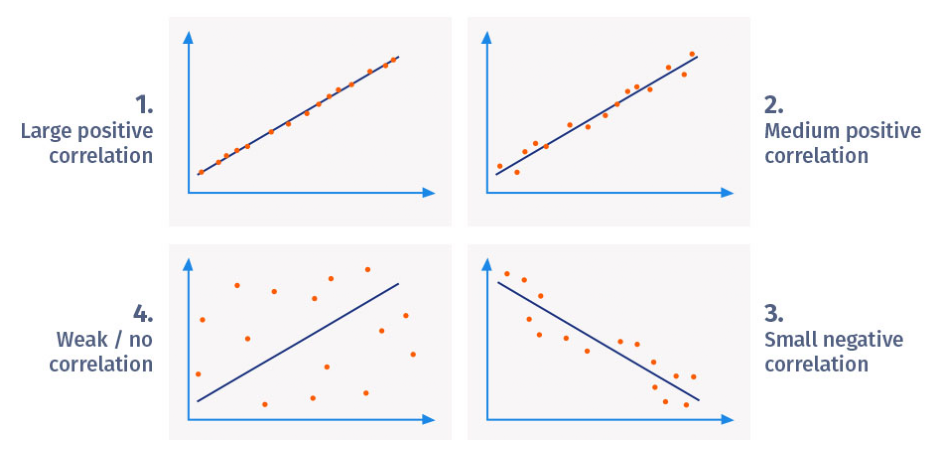

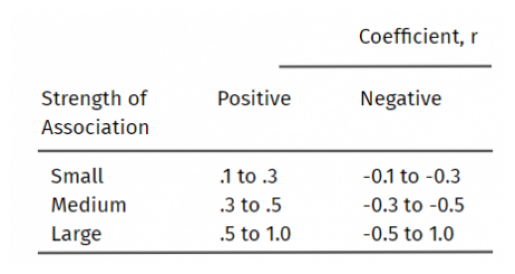

In [64]:
plt.figure(figsize=(12, 6));
plt.imshow(plt.imread("corr1.png")), plt.axis("off"), plt.show();
plt.imshow(plt.imread("corr2.png")), plt.axis("off"), plt.show();

In [65]:
correlations = df_dataset.select_dtypes(include=[float, int]).corr(method="pearson")
display.display(correlations)


,sepal_length,sepal_width,petal_length,petal_width,class_id
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
class_id,0.782561,-0.426658,0.949035,0.956547,1.000000


**Nhận xét**:
+ Các cặp tính chất có độ tương đồng cao:
    + (sepal-length, petal-length) = 0.872
    + (sepal-length, petal-width) = 0.818
    + (petal-length, petal-width) = 0.963

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

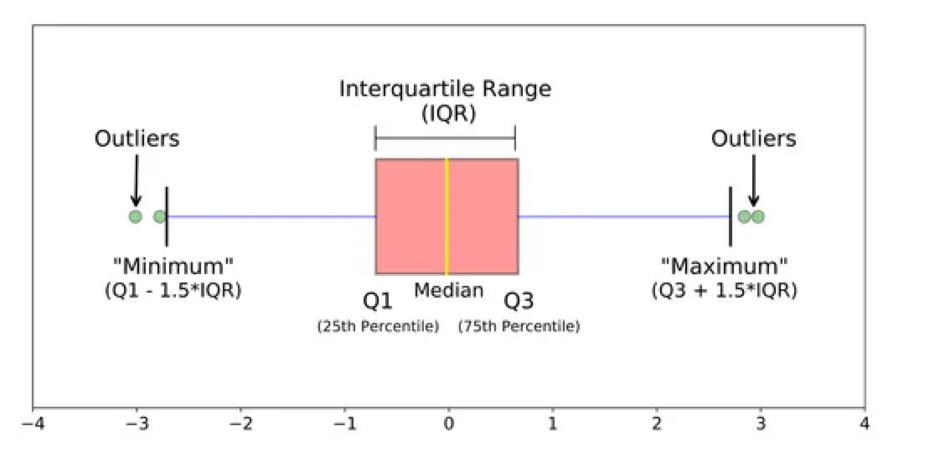

In [66]:
plt.figure(figsize=(12, 6)), plt.imshow(plt.imread("boxplots.png")), plt.axis("off"), plt.show();

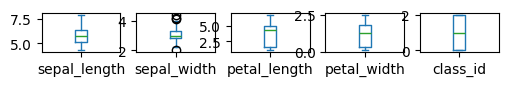

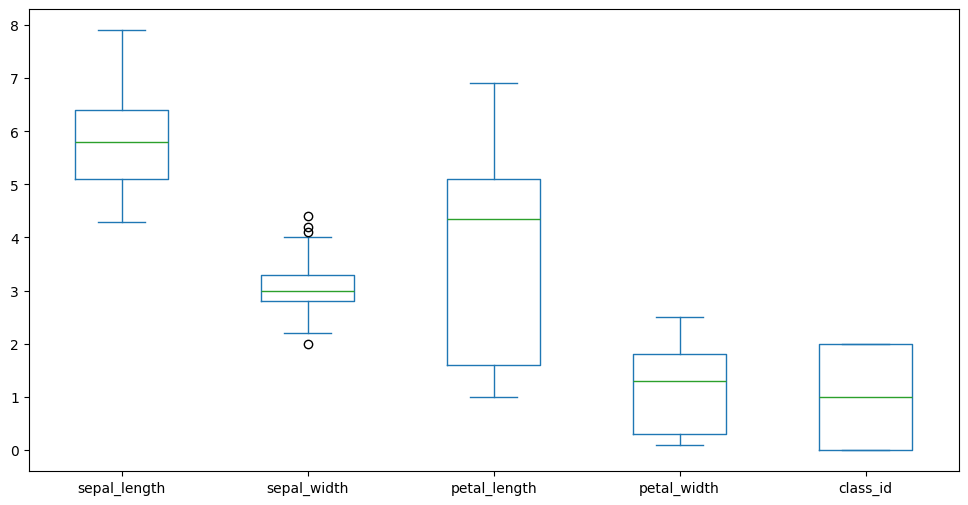

In [67]:
df_dataset.plot(kind="box", subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(12,6));
df_dataset.plot(kind="box", figsize=(12,6));

**Nhận xét**:
+ Độ trải rộng giữa các tính chất khá khác nhau (sepal-width, sepal-length, petal-width, petal-length)
+ Độ lệch của sepal-length, petal-length, petal-width theo hướng giá trị nhỏ.
+ Phân bố giá trị của sepal-width khá cân bằng

**Biểu đồ Histogram**

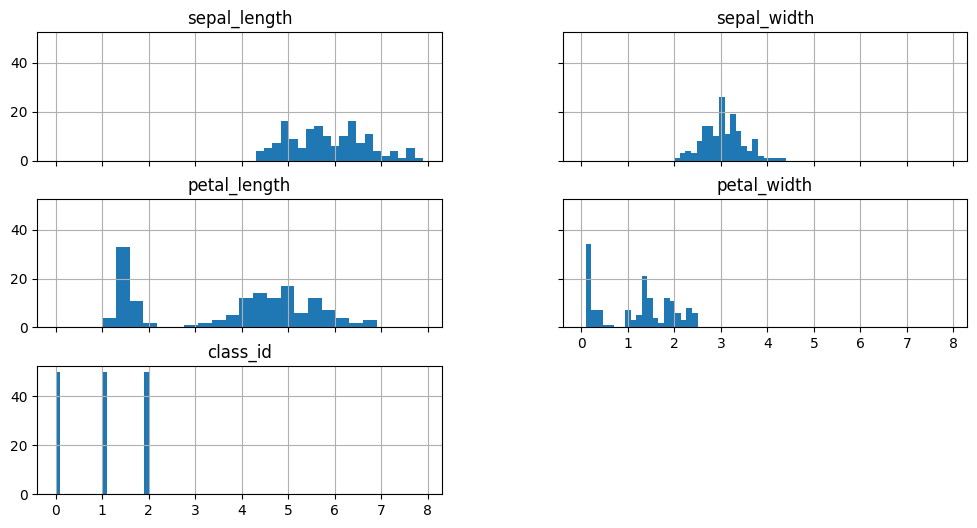

In [68]:
df_dataset.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

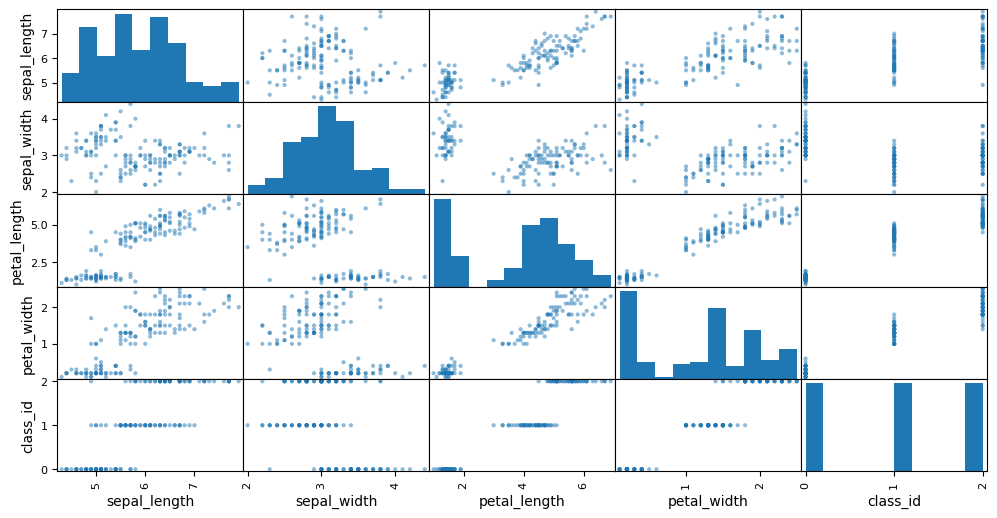

In [69]:
pd.plotting.scatter_matrix(df_dataset, figsize=(12,6));

+ Các cặp tính chất có độ tương đồng cao:
    + (sepal-length, petal-length) = 0.872
    + (sepal-length, petal-width) = 0.818
    + (petal-length, petal-width) = 0.963

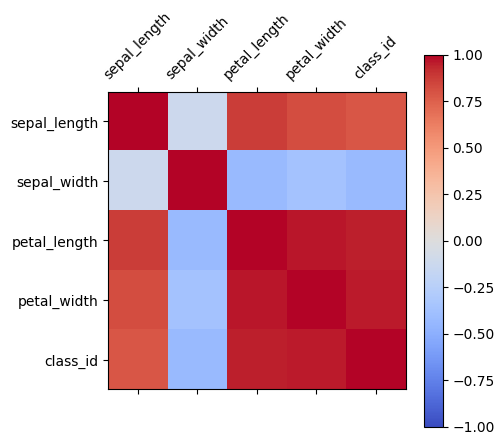

In [71]:
plt.matshow(correlations, vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar()

ticks = np.arange(len(correlations.columns))
plt.xticks(ticks, correlations.columns, rotation=45)
plt.yticks(ticks, correlations.columns)

plt.show()


## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [72]:
df_clean = df_dataset.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [73]:
display.display(df_dataset[df_dataset.duplicated()])

,sepal_length,sepal_width,petal_length,petal_width,class_id,species
142,5.8,2.7,5.1,1.9,2,Iris-virginica


In [76]:
# Đổi tên cột cho an toàn (tránh lỗi với 'class')
df_dataset = df_dataset.rename(columns={"class": "species"})

# Tạo 2 query
s_query1 = "sepal_length == 4.9 and sepal_width == 3.1 and species == 'Iris-setosa'"
s_query2 = "sepal_length == 5.8 and sepal_width == 2.7 and species == 'Iris-virginica'"

# Lấy dữ liệu theo 2 query
df_q1 = df_dataset.query(s_query1)
df_q2 = df_dataset.query(s_query2)

# Gộp lại thành một dataframe
df_result = pd.concat([df_q1, df_q2], axis=0).reset_index(drop=True)

# Hiển thị kết quả
from IPython import display
display.display(df_result)


,sepal_length,sepal_width,petal_length,petal_width,class_id,species
0,4.9,3.1,1.5,0.1,0,Iris-setosa
1,4.9,3.1,1.5,0.2,0,Iris-setosa
2,5.8,2.7,5.1,1.9,2,Iris-virginica
3,5.8,2.7,5.1,1.9,2,Iris-virginica


In [77]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

,sepal_length,sepal_width,petal_length,petal_width,class_id,species
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2,Iris-virginica
145,6.3,2.5,5.0,1.9,2,Iris-virginica
146,6.5,3.0,5.2,2.0,2,Iris-virginica
147,6.2,3.4,5.4,2.3,2,Iris-virginica


#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [78]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm:

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm:

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)
```

In [85]:
# Example:
df_example = pd.read_csv("data/Data.csv")
df_example

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [86]:
# Chúng ta xóa bỏ cột tính chất vi phạm
df_example.drop("Salary", axis = 1)

KeyError: "['Salary'] not found in axis"

In [ ]:
# Chúng ta xóa bỏ các dòng vi phạm
df_example.dropna(subset=["Salary", "Age"])

In [ ]:
# Điền giá trị hằng số (cho cột Age) hoặc median (cho cột Salary)
df_example["Age"].fillna(0, inplace=True)
median = df_example["Salary"].median()
df_example["Salary"].fillna(median, inplace=True)
df_example

### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [ ]:
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["class"])
class_names = class_encoder.classes_
print(class_names)

In [ ]:
class_encoder.transform(df_clean["class"])

In [ ]:
df_clean["class"] = class_encoder.transform(df_clean["class"])
df_clean

##### Example

In [ ]:
purchased_encoder = LabelEncoder()
purchased_encoder.fit(df_example["Purchased"])
purchased_names = purchased_encoder.classes_
print(purchased_names)
print(purchased_encoder.transform(df_example["Purchased"]))

In [ ]:
df_example["Purchased"] = purchased_encoder.transform(df_example["Purchased"])
df_example

#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn.

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

##### Example

In [ ]:
# Áp dụng cho cột country
df_contry_onehot = pd.get_dummies(df_example["Country"])
df_contry_onehot

In [ ]:
df_contry_onehot = pd.DataFrame(df_contry_onehot.values,
                                columns=["Is_France", "Is_Germany", "Is_Spain"])
df_contry_onehot

In [ ]:
df_example = df_example.drop("Country", axis = 1)
df_example = df_contry_onehot.join(df_example)
df_example

#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [ ]:
# Min-Max Normalization
scale_columns = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

In [ ]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [ ]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

In [ ]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [ ]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [ ]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

In [ ]:
# Lưu thông tin
save_dir = "exps/iris"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)
# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

os.listdir(save_dir)

In [ ]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

In [ ]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

In [ ]:
joblib.load(f'{save_dir}/class_encoder.joblib').classes_

# Kết thúc